In [177]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import interpolate
from IPython.display import clear_output

In [178]:
Nx = 2**6
Nt = 2**18
dx = 1/Nx
dz = 8*dx
dt = 1/Nt
xx = np.arange(0,1+dx,dx)
zz = np.arange(0,1+dz,dz)
tt = np.arange(0,0.25+dt,dt)
nu = 0.025
resolution = np.int32(Nt/64)

def compute_c(xx):
    cx = np.zeros_like(xx)
    count = 0
    for index,x in enumerate(xx):
        rel_index = index/xx.shape[0]*100
        if rel_index >= count*10 or index==0:
            val = np.random.choice([0.5,1.0,1.5])
            count += 1
        cx[index] = val
    return cx

def compute_u0(xx,zz, mean=0, std_dev=0.5):
    mean = 0
    std_dev = 1
    u0_ = np.random.normal(mean, std_dev, zz.shape[0])
    u0_[0] = 0
    u0_[-1] = 0
    spl = interpolate.splrep(zz,u0_)
    u0 = interpolate.splev(xx,spl)
    u0[0] = 0
    u0[-1] = 0
    return u0


In [179]:
input_list = []
output_list = []
N_samples = 50
for n in range(N_samples):
    u0 = compute_u0(xx,zz)
    uh = np.zeros((xx.shape[0],tt.shape[0]))
    uh[:,0] = u0
    last_j=0
    for j in range(0, tt.shape[0]-1):
        cx = np.random.uniform(0.5,1.5,1)*np.ones_like(u0)
        for i in range(1, xx.shape[0]-1):
            uh[i,j+1] = uh[i,j] + nu*dt*(uh[i+1,j] - 2*uh[i,j] + uh[i-1,j])/(dx**2) - 0.5*cx[i-1]*dt*(uh[i,j]**2-uh[i-1,j]**2)/dx
        if np.mod(j,resolution)==0 and not(j==0):
            factor = np.amax(np.abs(uh[:,last_j]))
            input_list.append([1/factor*uh[:,last_j], 1/factor*cx])
            output_list.append(1/factor*(uh[:,j]))
            last_j=j
    clear_output(wait=True)
    print('Advancing: '+str((n+1)/N_samples*100) +'%')

Advancing: 100.0%


In [180]:
input = np.array(input_list)
output = np.array(output_list)

In [181]:
count=0
for record in input:
    for k in range(record.shape[1]):
        if record[0,k]!=record[0,k]:
            print('NaN found in record ' + str(count))
            break
    count +=1

In [235]:
input = np.concatenate((input[0:15*41],input[15*47:]))
output = np.concatenate((output[0:15*41],output[15*47:]))

from sklearn.model_selection import train_test_split
input_train, input_test, output_train, output_test = train_test_split(input, output)

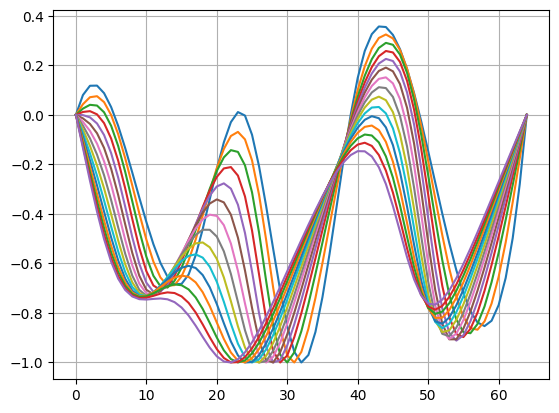

In [234]:
plt.figure()
plt.grid(True)
batch = 47
for i in range(15*batch,15*(batch+1)):
    plt.plot(input[i,0,:])
    # plt.plot(input[i,1,:], linestyle='--')

In [101]:
folder = 'Burgers_time_cx'
save_flag = False
# save_flag = True
if save_flag:
    np.save('../data/' + folder + '/input_train.npy', input_train)
    np.save('../data/' + folder + '/output_train.npy', output_train)
    np.save('../data/' + folder + '/input_test.npy', input_test)
    np.save('../data/' + folder + '/output_test.npy', output_test)
    print('dataset saved in: ' + folder)
else:
    print('dataset not saved')

dataset saved in: Burgers_time_cx


In [236]:
folder = 'Burgers_time_cx'
add_flag = False
add_flag = True
if add_flag:
    input_train_old=np.load('../data/' + folder + '/input_train.npy')
    input_test_old=np.load('../data/' + folder + '/input_test.npy')
    output_train_old=np.load('../data/' + folder + '/output_train.npy')
    output_test_old=np.load('../data/' + folder + '/output_test.npy')
    input_train_new = np.concatenate((input_train_old, input_train))
    input_test_new = np.concatenate((input_test_old, input_test))
    output_train_new = np.concatenate((output_train_old, output_train))
    output_test_new = np.concatenate((output_test_old, output_test))
    np.save('../data/' + folder + '/input_train.npy', input_train_new)
    np.save('../data/' + folder + '/output_train.npy', output_train_new)
    np.save('../data/' + folder + '/input_test.npy', input_test_new)
    np.save('../data/' + folder + '/output_test.npy', output_test_new)
    print('dataset augmented')
else:
    print('dataset not augmented')

dataset augmented
